In [1]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
img_size = (224, 224) # height, width
utilInstance = mel.Util(rootpath, img_size)
dataType = mel.DatasetType.ISIC2017


CREATE_DB = 0
# Save datasets as pickle files
if (CREATE_DB == 1):
    utilInstance.saveDatasetsToFile(dataType, 1.2)



2023-12-31 18:07:33.394727: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [4]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  30,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =   90.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.1, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.1, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = optimizer2,
			# loss='binary_crossentropy',
			loss='categorical_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  0,   # 0.01; 0.05; 0.1; 0.2;
			# run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

2023-12-30 17:58:25.863983: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-12-30 17:58:26.043314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-12-30 17:58:26.043353: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-12-30 17:58:26.048083: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-30 17:58:26.048118: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-12-30 17:58:26.049441: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

2023-12-30 17:58:28.773080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-30 17:58:28.792791: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/30


2023-12-30 17:58:31.910109: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-30 17:58:32.612083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-30 17:58:33.318965: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-30 17:58:33.318986: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-30 17:58:33.319050: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-30 17:58:33.360881: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-30 17:58:34.070242: I tensorflow/stream_exec

  1/125 [..............................] - ETA: 12:26 - loss: 0.9929 - accuracy: 0.5000

2023-12-30 17:58:34.816096: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


125/125 [==============================] - 73s 543ms/step - loss: 0.9119 - accuracy: 0.5647 - val_loss: 0.4016 - val_accuracy: 0.8584


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
125/125 [==============================] - 66s 521ms/step - loss: 0.7542 - accuracy: 0.6293 - val_loss: 0.3641 - val_accuracy: 0.9026
Epoch 3/30
125/125 [==============================] - 66s 525ms/step - loss: 0.6458 - accuracy: 0.6861 - val_loss: 0.3296 - val_accuracy: 0.9071
Epoch 4/30
125/125 [==============================] - 66s 525ms/step - loss: 0.5863 - accuracy: 0.7250 - val_loss: 0.3076 - val_accuracy: 0.9060
Epoch 5/30
125/125 [==============================] - 66s 526ms/step - loss: 0.5288 - accuracy: 0.7596 - val_loss: 0.2739 - val_accuracy: 0.9366
Epoch 6/30
125/125 [==============================] - 66s 525ms/step - loss: 0.4799 - accuracy: 0.7891 - val_loss: 0.1991 - val_accuracy: 0.9615
Epoch 7/30
125/125 [==============================] - 66s 523ms/step - loss: 0.4480 - accuracy: 0.8039 - val_loss: 0.2047 - val_accuracy: 0.9456
Epoch 8/30
125/125 [==============================] - 66s 528ms/step - loss: 0.4222 - accuracy: 0.8220 - val_loss: 0.1748 - val_ac

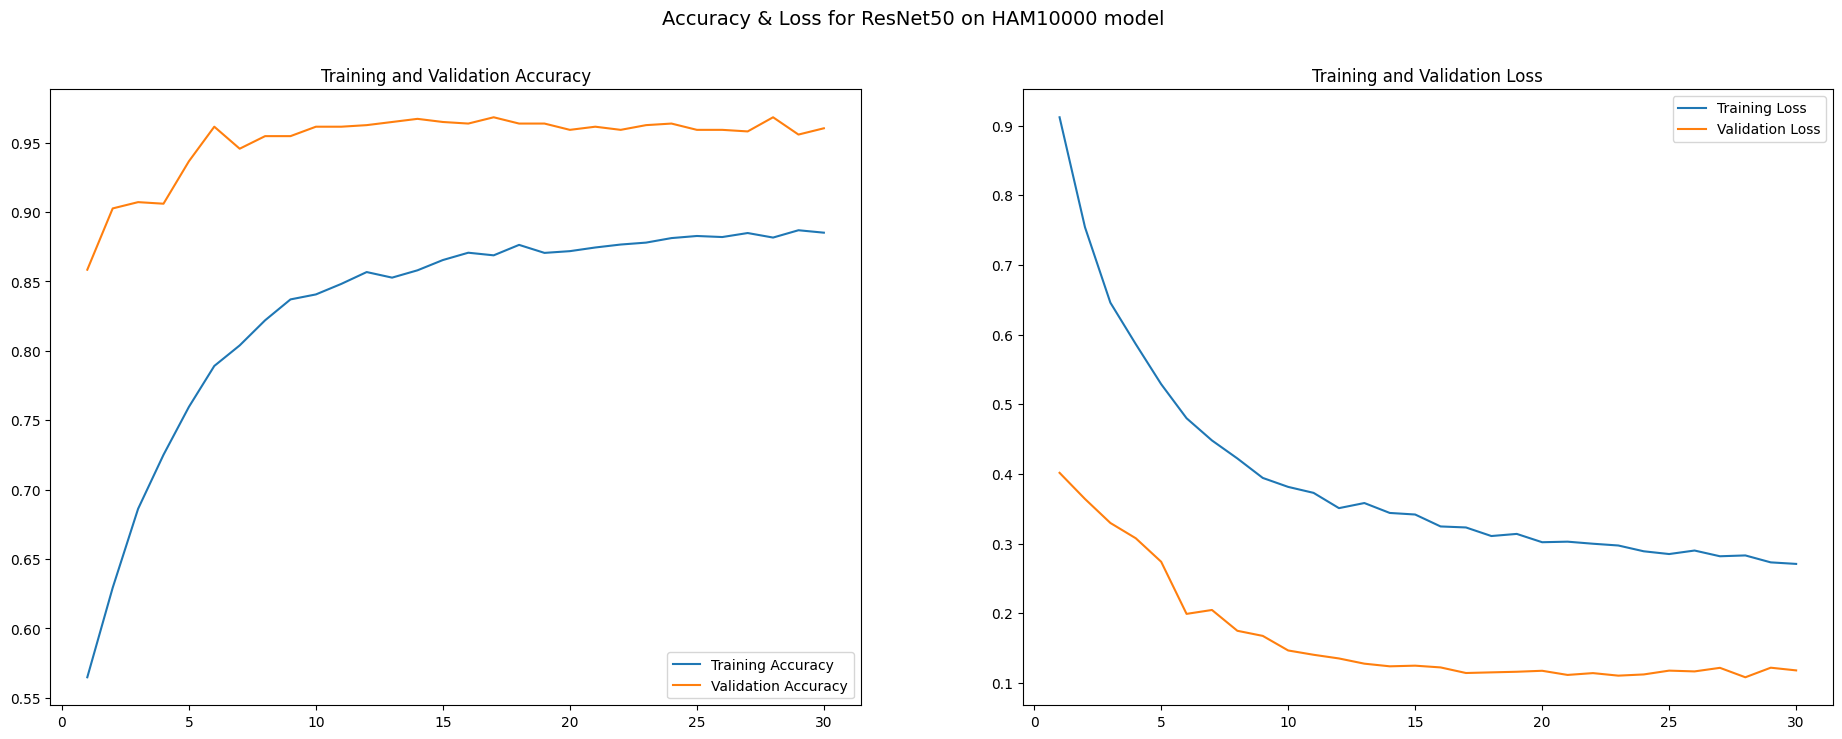

In [3]:
# Solely training HAM10000
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000'
model = base_model.myresnet50()

# Train HAM10000
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [15]:
model_name = 'HAM10000 test'
filename = 'ResNet50 on HAM10000.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

# KaggleDB_224h_224w.pkl

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating HAM10000 test model...

52/52 [==============================] - 2s 35ms/step - loss: 0.9754 - accuracy: 0.6268
Train loss = 0.9754064679145813  ;  Train accuracy = 62.68%

32/32 [==============================] - 1s 40ms/step - loss: 0.9915 - accuracy: 0.6150
Validation loss = 0.9915407299995422  ;  Validation accuracy = 61.50%

21/21 [==============================] - 0s 22ms/step - loss: 0.9987 - accuracy: 0.6182
Test loss = 0.9987071752548218  ;  Test accuracy = 61.82%
Testing on HAM10000
Evaluating HAM10000 test model...

251/251 [==============================] - 7s 24ms/step - loss: 0.2284 - accuracy: 0.9004
Train loss = 0.22835618257522583  ;  Train accuracy = 90.04%

28/28 [==============================] - 1s 22ms/step - loss: 0.1081 - accuracy: 0.9683
Validation loss = 0.10807966440916061  ;  Validation accuracy = 96.83%

35/35 [==============================] - 1s 22ms/step - loss: 0.1027 - accuracy: 0.9601
Test loss = 0.10269609838724136  ; 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
185/185 [==============================] - 14s 73ms/step - loss: 0.4851 - accuracy: 0.7901 - val_loss: 0.1361 - val_accuracy: 0.9604
Epoch 3/30
185/185 [==============================] - 14s 73ms/step - loss: 0.4471 - accuracy: 0.8050 - val_loss: 0.1273 - val_accuracy: 0.9615
Epoch 4/30
185/185 [==============================] - 14s 73ms/step - loss: 0.4301 - accuracy: 0.8151 - val_loss: 0.1186 - val_accuracy: 0.9626
Epoch 5/30
185/185 [==============================] - 14s 74ms/step - loss: 0.4030 - accuracy: 0.8231 - val_loss: 0.1209 - val_accuracy: 0.9649
Epoch 6/30
185/185 [==============================] - 14s 77ms/step - loss: 0.3927 - accuracy: 0.8273 - val_loss: 0.1181 - val_accuracy: 0.9660
Epoch 7/30
185/185 [==============================] - 14s 76ms/step - loss: 0.3794 - accuracy: 0.8313 - val_loss: 0.1209 - val_accuracy: 0.9626
Epoch 8/30
185/185 [==============================] - 14s 76ms/step - loss: 0.3632 - accuracy: 0.8373 - val_loss: 0.1207 - val_accuracy:

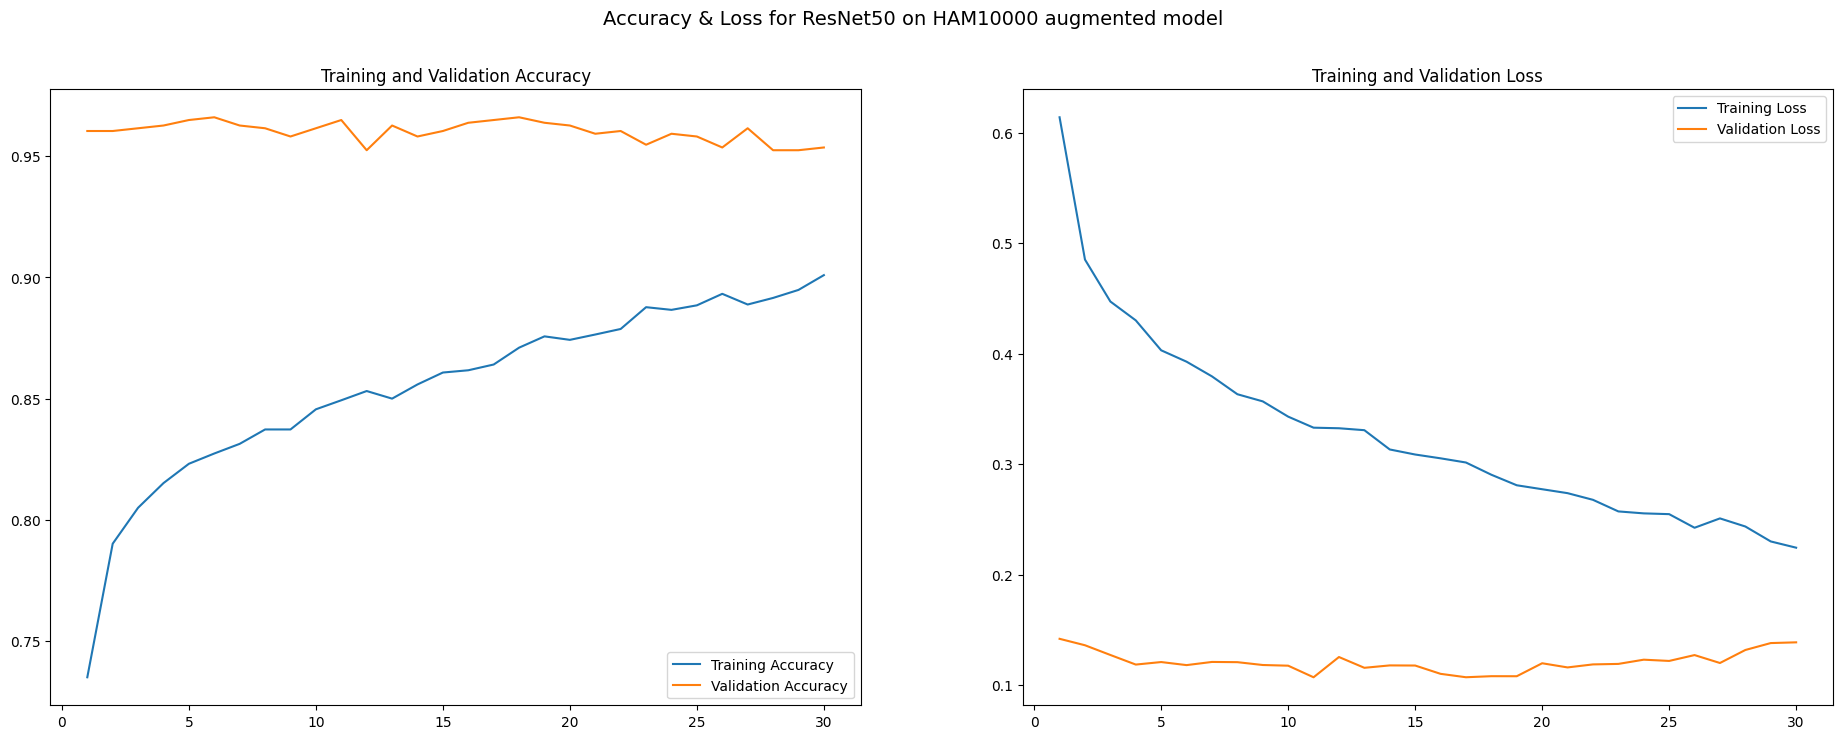

In [8]:
# Solely training HAM10000 self-augmented
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages_HAM10000_augmented, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000_augmented, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl')
# HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000 self-augmented'
model = base_model.myresnet50()

# Train HAM10000
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000_augmented,
    trainlabels = trainlabels_binary_HAM10000_augmented,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [16]:
model_name = 'HAM10000 augmented test'
filename = 'ResNet50 on HAM10000 augmented.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating HAM10000 augmented test model...



52/52 [==============================] - 2s 23ms/step - loss: 0.9074 - accuracy: 0.6457
Train loss = 0.9073830842971802  ;  Train accuracy = 64.57%

32/32 [==============================] - 1s 22ms/step - loss: 0.8609 - accuracy: 0.6560
Validation loss = 0.8608693480491638  ;  Validation accuracy = 65.60%

21/21 [==============================] - 0s 22ms/step - loss: 0.8855 - accuracy: 0.6500
Test loss = 0.8855112791061401  ;  Test accuracy = 65.00%
Testing on HAM10000
Evaluating HAM10000 augmented test model...



251/251 [==============================] - 6s 23ms/step - loss: 0.2110 - accuracy: 0.9108
Train loss = 0.21097137033939362  ;  Train accuracy = 91.08%

28/28 [==============================] - 1s 22ms/step - loss: 0.1071 - accuracy: 0.9649
Validation loss = 0.10707103461027145  ;  Validation accuracy = 96.49%

35/35 [==============================] - 1s 22ms/step - loss: 0.1033 - accuracy: 0.9583
Test loss = 0.10326261818408966  ;  Test accuracy = 95.83%
Testing on ISIC2016
Evaluating HAM10000 augmented test model...



23/23 [==============================] - 1s 23ms/step - loss: 0.5469 - accuracy: 0.8111
Train loss = 0.5469486713409424  ;  Train accuracy = 81.11%

6/6 [==============================] - 0s 21ms/step - loss: 0.4243 - accuracy: 0.8444
Validation loss = 0.4242863953113556  ;  Validation accuracy = 84.44%

12/12 [==============================] - 0s 22ms/step - loss: 0.5164 - accuracy: 0.8179
Test loss = 0.5163537859916687  ;  Test accuracy = 81.79%
Testing on ISIC2017
Evaluating HAM10000 augmented test model...



63/63 [==============================] - 2s 23ms/step - loss: 0.5551 - accuracy: 0.8210
Train loss = 0.5551441311836243  ;  Train accuracy = 82.10%

5/5 [==============================] - 0s 21ms/step - loss: 0.5938 - accuracy: 0.8200
Validation loss = 0.5937996506690979  ;  Validation accuracy = 82.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.6185 - accuracy: 0.8100
Test loss = 0.6185224652290344  ;  Test accuracy = 81.00%


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
185/185 [==============================] - 98s 528ms/step - loss: 0.5085 - accuracy: 0.7821 - val_loss: 0.1271 - val_accuracy: 0.9638
Epoch 3/30
185/185 [==============================] - 99s 531ms/step - loss: 0.4809 - accuracy: 0.7887 - val_loss: 0.1292 - val_accuracy: 0.9615
Epoch 4/30
185/185 [==============================] - 98s 529ms/step - loss: 0.4547 - accuracy: 0.8007 - val_loss: 0.1296 - val_accuracy: 0.9626
Epoch 5/30
185/185 [==============================] - 99s 530ms/step - loss: 0.4312 - accuracy: 0.8084 - val_loss: 0.1246 - val_accuracy: 0.9604
Epoch 6/30
185/185 [==============================] - 99s 530ms/step - loss: 0.4279 - accuracy: 0.8084 - val_loss: 0.1224 - val_accuracy: 0.9615
Epoch 7/30
185/185 [==============================] - 99s 531ms/step - loss: 0.4168 - accuracy: 0.8123 - val_loss: 0.1111 - val_accuracy: 0.9649
Epoch 8/30
185/185 [==============================] - 98s 529ms/step - loss: 0.4068 - accuracy: 0.8121 - val_loss: 0.1216 - val_ac

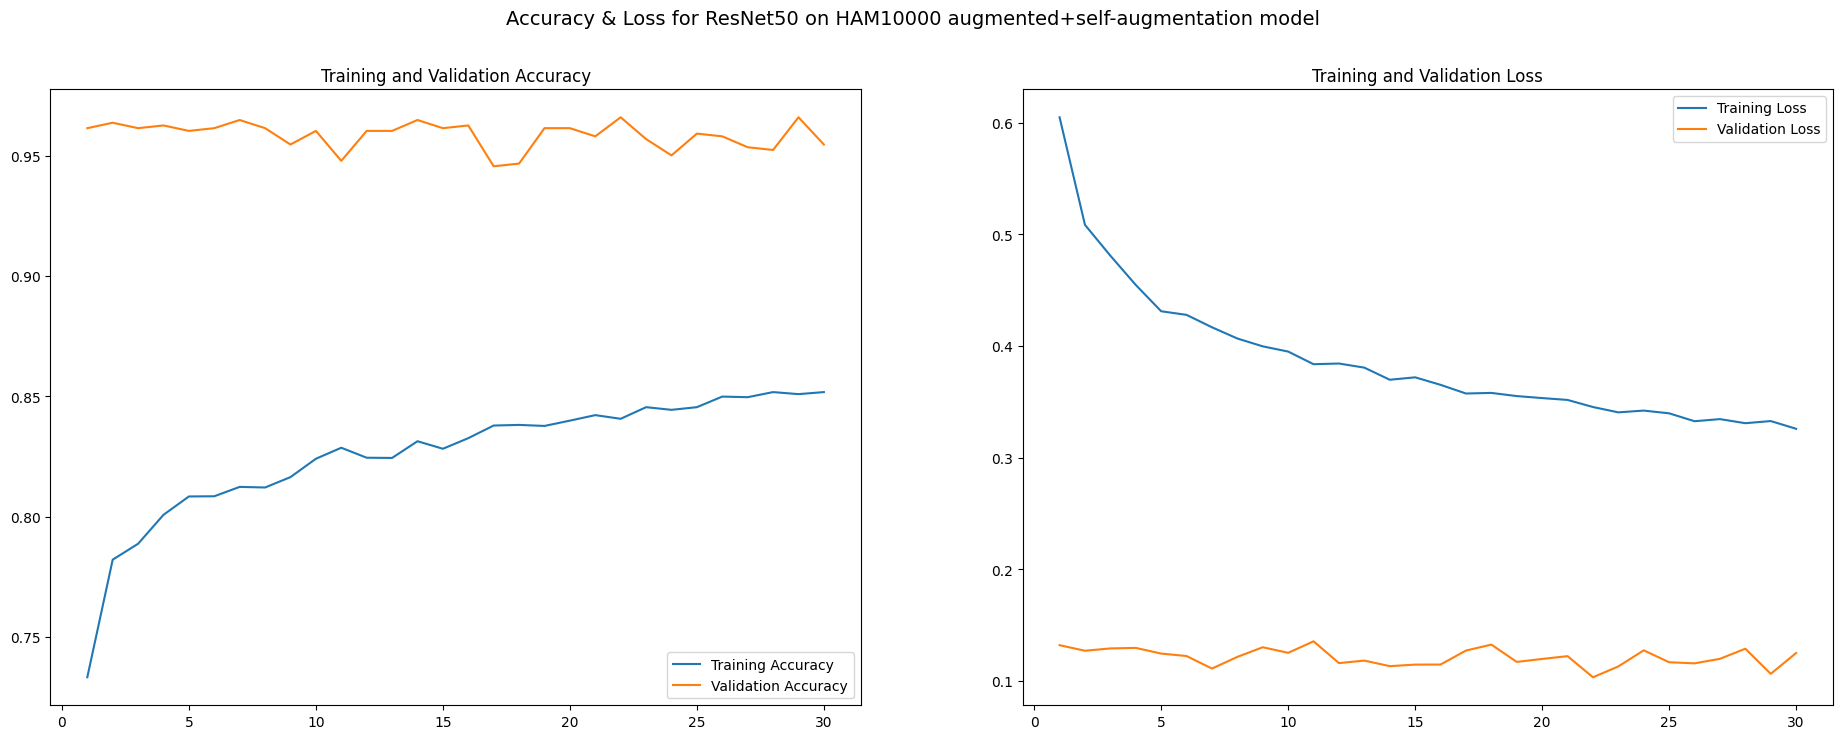

In [10]:
# Solely training HAM10000 augmented + self-augmentation
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages_HAM10000_augmented, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000_augmented, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000 augmented+self-augmentation'
model = base_model.myresnet50()

# Train HAM10000 augmented + self-augmentation
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000_augmented,
    trainlabels = trainlabels_binary_HAM10000_augmented,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [17]:
model_name = 'HAM10000 augmented+self-augmentation test'
filename = 'ResNet50 on HAM10000 augmented+self-augmentation.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating HAM10000 augmented+self-augmentation test model...



52/52 [==============================] - 2s 23ms/step - loss: 0.9200 - accuracy: 0.6487
Train loss = 0.9199824929237366  ;  Train accuracy = 64.87%

32/32 [==============================] - 1s 22ms/step - loss: 0.8658 - accuracy: 0.6590
Validation loss = 0.8657664656639099  ;  Validation accuracy = 65.90%

21/21 [==============================] - 0s 22ms/step - loss: 0.8995 - accuracy: 0.6409
Test loss = 0.8994593024253845  ;  Test accuracy = 64.09%
Testing on HAM10000
Evaluating HAM10000 augmented+self-augmentation test model...



251/251 [==============================] - 6s 23ms/step - loss: 0.2305 - accuracy: 0.9021
Train loss = 0.23048637807369232  ;  Train accuracy = 90.21%

28/28 [==============================] - 1s 22ms/step - loss: 0.1033 - accuracy: 0.9660
Validation loss = 0.10333405435085297  ;  Validation accuracy = 96.60%

35/35 [==============================] - 1s 22ms/step - loss: 0.1025 - accuracy: 0.9628
Test loss = 0.10252894461154938  ;  Test accuracy = 96.28%
Testing on ISIC2016
Evaluating HAM10000 augmented+self-augmentation test model...



23/23 [==============================] - 1s 24ms/step - loss: 0.5255 - accuracy: 0.8083
Train loss = 0.5255160331726074  ;  Train accuracy = 80.83%

6/6 [==============================] - 0s 21ms/step - loss: 0.4484 - accuracy: 0.8222
Validation loss = 0.4483935832977295  ;  Validation accuracy = 82.22%

12/12 [==============================] - 0s 22ms/step - loss: 0.5029 - accuracy: 0.8179
Test loss = 0.5029019713401794  ;  Test accuracy = 81.79%
Testing on ISIC2017
Evaluating HAM10000 augmented+self-augmentation test model...



63/63 [==============================] - 2s 22ms/step - loss: 0.5497 - accuracy: 0.8170
Train loss = 0.5497460961341858  ;  Train accuracy = 81.70%

5/5 [==============================] - 0s 21ms/step - loss: 0.6499 - accuracy: 0.8200
Validation loss = 0.6499125957489014  ;  Validation accuracy = 82.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.6239 - accuracy: 0.8117
Test loss = 0.623870849609375  ;  Test accuracy = 81.17%


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
11/11 [==============================] - 6s 538ms/step - loss: 0.8891 - accuracy: 0.5869 - val_loss: 0.8970 - val_accuracy: 0.4944
Epoch 3/30
11/11 [==============================] - 6s 498ms/step - loss: 0.8103 - accuracy: 0.6204 - val_loss: 0.8099 - val_accuracy: 0.5611
Epoch 4/30
11/11 [==============================] - 6s 502ms/step - loss: 0.7836 - accuracy: 0.6509 - val_loss: 0.6976 - val_accuracy: 0.6111
Epoch 5/30
11/11 [==============================] - 6s 567ms/step - loss: 0.6918 - accuracy: 0.6616 - val_loss: 0.5175 - val_accuracy: 0.7222
Epoch 6/30
11/11 [==============================] - 6s 500ms/step - loss: 0.6657 - accuracy: 0.6768 - val_loss: 0.4484 - val_accuracy: 0.8000
Epoch 7/30
11/11 [==============================] - 6s 499ms/step - loss: 0.6348 - accuracy: 0.6860 - val_loss: 0.4475 - val_accuracy: 0.8000
Epoch 8/30
11/11 [==============================] - 6s 503ms/step - loss: 0.6193 - accuracy: 0.7088 - val_loss: 0.4506 - val_accuracy: 0.7722
Epoch 

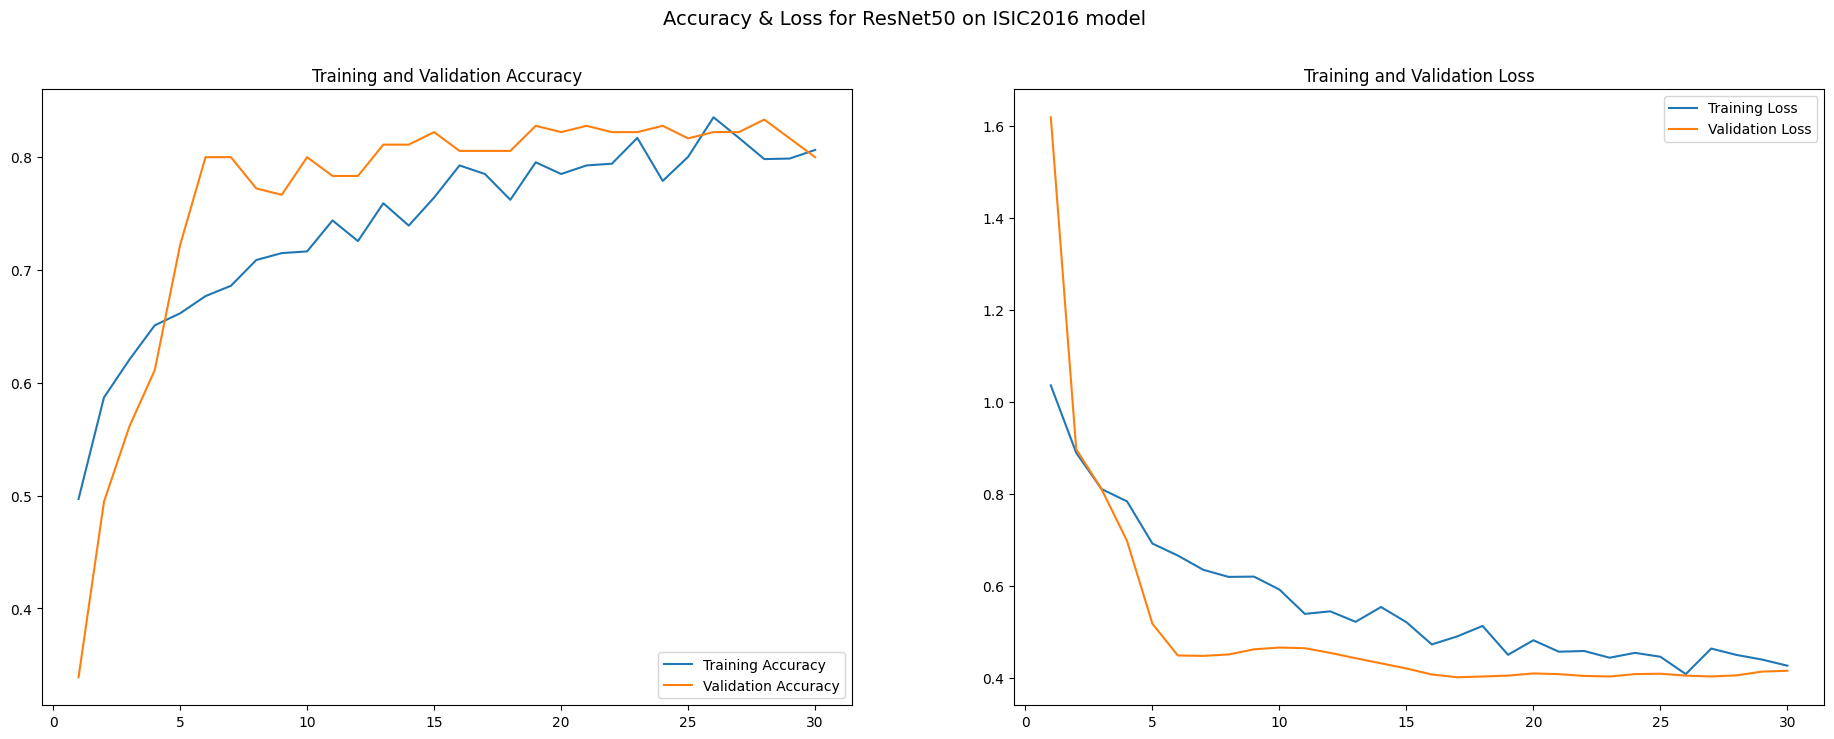

In [12]:
# Solely training ISIC2016
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016'
model = base_model.myresnet50()

# Train ISIC2016
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [18]:
model_name = 'ResNet50 trained with ISIC2016'
filename = 'ResNet50 on ISIC2016.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with ISIC2016 model...



52/52 [==============================] - 2s 22ms/step - loss: 0.6731 - accuracy: 0.6677
Train loss = 0.6730645298957825  ;  Train accuracy = 66.77%

32/32 [==============================] - 1s 22ms/step - loss: 0.6529 - accuracy: 0.6710
Validation loss = 0.652876079082489  ;  Validation accuracy = 67.10%

21/21 [==============================] - 0s 22ms/step - loss: 0.6738 - accuracy: 0.6758
Test loss = 0.6738151907920837  ;  Test accuracy = 67.58%
Testing on HAM10000
Evaluating ResNet50 trained with ISIC2016 model...



251/251 [==============================] - 6s 22ms/step - loss: 0.3843 - accuracy: 0.8423
Train loss = 0.38429760932922363  ;  Train accuracy = 84.23%

28/28 [==============================] - 1s 22ms/step - loss: 0.2449 - accuracy: 0.9287
Validation loss = 0.2448599487543106  ;  Validation accuracy = 92.87%

35/35 [==============================] - 1s 23ms/step - loss: 0.2510 - accuracy: 0.9284
Test loss = 0.25097355246543884  ;  Test accuracy = 92.84%
Testing on ISIC2016
Evaluating ResNet50 trained with ISIC2016 model...



23/23 [==============================] - 1s 23ms/step - loss: 0.3124 - accuracy: 0.8694
Train loss = 0.3124171495437622  ;  Train accuracy = 86.94%

6/6 [==============================] - 0s 21ms/step - loss: 0.4010 - accuracy: 0.8056
Validation loss = 0.4010111093521118  ;  Validation accuracy = 80.56%

12/12 [==============================] - 0s 22ms/step - loss: 0.3902 - accuracy: 0.8417
Test loss = 0.39016103744506836  ;  Test accuracy = 84.17%
Testing on ISIC2017
Evaluating ResNet50 trained with ISIC2016 model...



63/63 [==============================] - 2s 22ms/step - loss: 0.4069 - accuracy: 0.8315
Train loss = 0.40694209933280945  ;  Train accuracy = 83.15%

5/5 [==============================] - 0s 20ms/step - loss: 0.4462 - accuracy: 0.7933
Validation loss = 0.4462408423423767  ;  Validation accuracy = 79.33%

19/19 [==============================] - 0s 22ms/step - loss: 0.4995 - accuracy: 0.7967
Test loss = 0.4995289742946625  ;  Test accuracy = 79.67%


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
17/17 [==============================] - 2s 83ms/step - loss: 0.7046 - accuracy: 0.6767 - val_loss: 0.5633 - val_accuracy: 0.8167
Epoch 3/30
17/17 [==============================] - 1s 77ms/step - loss: 0.6270 - accuracy: 0.7196 - val_loss: 0.5024 - val_accuracy: 0.8333
Epoch 4/30
17/17 [==============================] - 1s 76ms/step - loss: 0.5700 - accuracy: 0.7468 - val_loss: 0.4648 - val_accuracy: 0.8333
Epoch 5/30
17/17 [==============================] - 1s 81ms/step - loss: 0.5324 - accuracy: 0.7566 - val_loss: 0.4532 - val_accuracy: 0.8222
Epoch 6/30
17/17 [==============================] - 1s 77ms/step - loss: 0.4801 - accuracy: 0.7683 - val_loss: 0.4436 - val_accuracy: 0.8333
Epoch 7/30
17/17 [==============================] - 1s 76ms/step - loss: 0.4949 - accuracy: 0.7722 - val_loss: 0.4468 - val_accuracy: 0.8222
Epoch 8/30
17/17 [==============================] - 1s 76ms/step - loss: 0.4631 - accuracy: 0.8033 - val_loss: 0.4146 - val_accuracy: 0.8222
Epoch 9/30
17

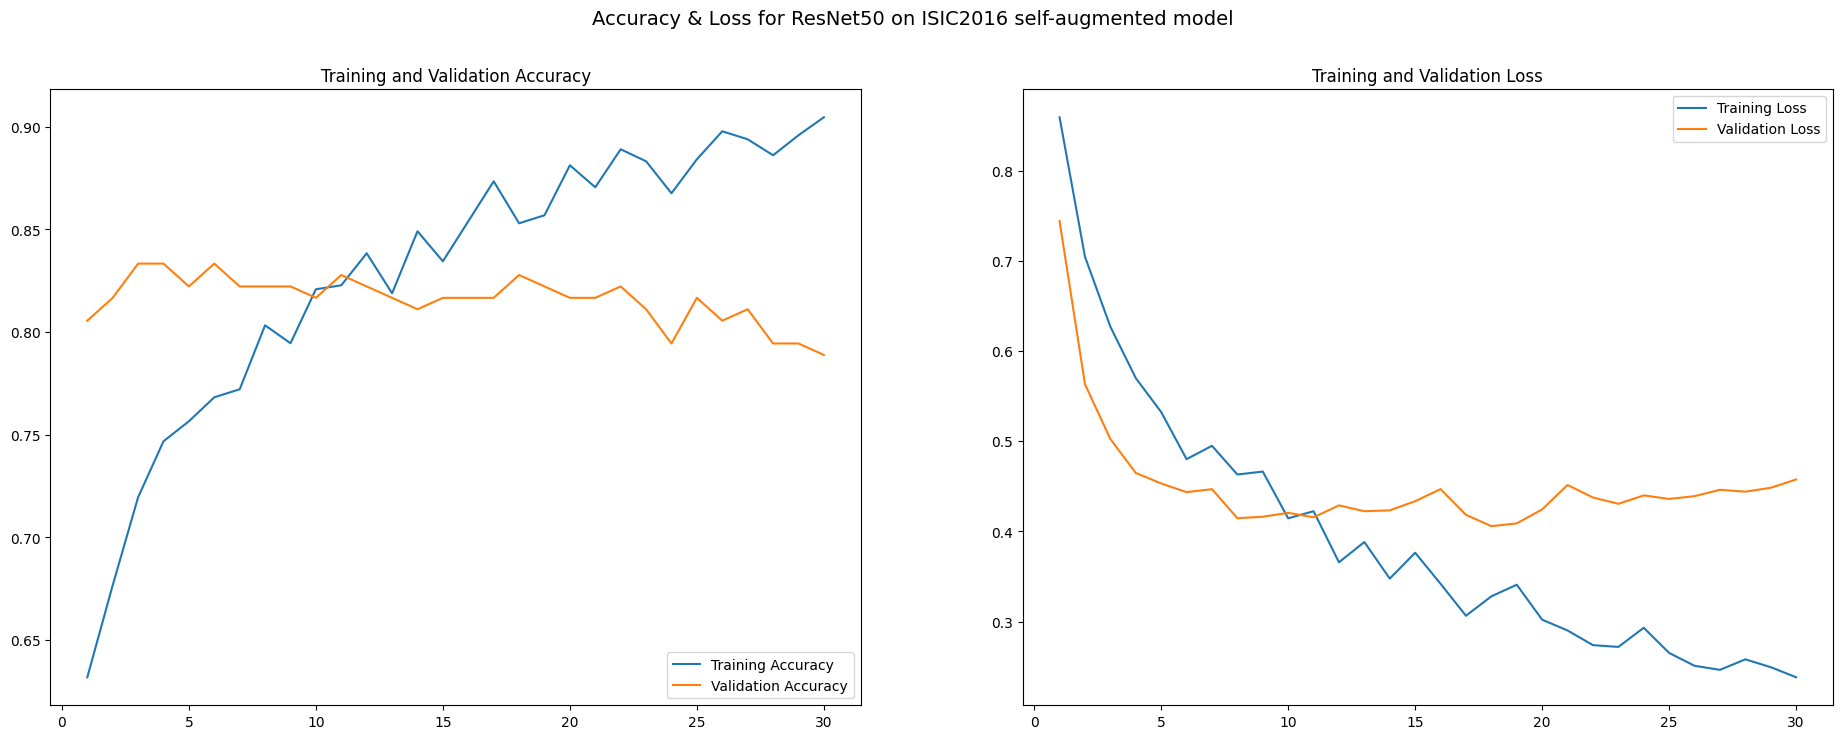

In [15]:
# training ISIC2016 self-augmented
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages_ISIC2016_augmented, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016_augmented, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_augmentedWith_254Melanoma_117Non-Melanoma_224h_224w_binary.pkl')
# ISIC2016_augmentedWith_254Melanoma_117Non-Melanoma_224h_224w_binary.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016 self-augmented'
model = base_model.myresnet50()

# Train ISIC2016 self-augmented
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_ISIC2016_augmented,
    trainlabels = trainlabels_binary_ISIC2016_augmented,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [19]:
model_name = 'ResNet50 trained with ISIC2016 self-augmented'
filename = 'ResNet50 on ISIC2016 self-augmented.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with ISIC2016 self-augmented model...



52/52 [==============================] - 2s 23ms/step - loss: 0.8205 - accuracy: 0.6164
Train loss = 0.8204574584960938  ;  Train accuracy = 61.64%

32/32 [==============================] - 1s 22ms/step - loss: 0.7523 - accuracy: 0.6540
Validation loss = 0.7522919178009033  ;  Validation accuracy = 65.40%

21/21 [==============================] - 0s 22ms/step - loss: 0.7839 - accuracy: 0.6364
Test loss = 0.7838656306266785  ;  Test accuracy = 63.64%
Testing on HAM10000
Evaluating ResNet50 trained with ISIC2016 self-augmented model...



251/251 [==============================] - 6s 22ms/step - loss: 0.4680 - accuracy: 0.7959
Train loss = 0.4679728150367737  ;  Train accuracy = 79.59%

28/28 [==============================] - 1s 22ms/step - loss: 0.3587 - accuracy: 0.8460
Validation loss = 0.3586820960044861  ;  Validation accuracy = 84.60%

35/35 [==============================] - 1s 23ms/step - loss: 0.3628 - accuracy: 0.8477
Test loss = 0.36277759075164795  ;  Test accuracy = 84.77%
Testing on ISIC2016
Evaluating ResNet50 trained with ISIC2016 self-augmented model...



23/23 [==============================] - 1s 24ms/step - loss: 0.2036 - accuracy: 0.9111
Train loss = 0.20361758768558502  ;  Train accuracy = 91.11%

6/6 [==============================] - 0s 21ms/step - loss: 0.4058 - accuracy: 0.8278
Validation loss = 0.4057881534099579  ;  Validation accuracy = 82.78%

12/12 [==============================] - 0s 22ms/step - loss: 0.4028 - accuracy: 0.8285
Test loss = 0.4028168022632599  ;  Test accuracy = 82.85%
Testing on ISIC2017
Evaluating ResNet50 trained with ISIC2016 self-augmented model...



63/63 [==============================] - 3s 23ms/step - loss: 0.3922 - accuracy: 0.8320
Train loss = 0.3922107517719269  ;  Train accuracy = 83.20%

5/5 [==============================] - 0s 24ms/step - loss: 0.4634 - accuracy: 0.8333
Validation loss = 0.46340662240982056  ;  Validation accuracy = 83.33%

19/19 [==============================] - 0s 22ms/step - loss: 0.5325 - accuracy: 0.7817
Test loss = 0.5325086116790771  ;  Test accuracy = 78.17%


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
31/31 [==============================] - 16s 516ms/step - loss: 0.7204 - accuracy: 0.6482 - val_loss: 0.5890 - val_accuracy: 0.6733
Epoch 3/30
31/31 [==============================] - 17s 518ms/step - loss: 0.6631 - accuracy: 0.6705 - val_loss: 0.4772 - val_accuracy: 0.7733
Epoch 4/30
31/31 [==============================] - 17s 518ms/step - loss: 0.6130 - accuracy: 0.6946 - val_loss: 0.4617 - val_accuracy: 0.7867
Epoch 5/30
31/31 [==============================] - 17s 522ms/step - loss: 0.5717 - accuracy: 0.7288 - val_loss: 0.4552 - val_accuracy: 0.7867
Epoch 6/30
31/31 [==============================] - 17s 517ms/step - loss: 0.5515 - accuracy: 0.7428 - val_loss: 0.4386 - val_accuracy: 0.7933
Epoch 7/30
31/31 [==============================] - 16s 515ms/step - loss: 0.5563 - accuracy: 0.7428 - val_loss: 0.4513 - val_accuracy: 0.8133
Epoch 8/30
31/31 [==============================] - 16s 528ms/step - loss: 0.5229 - accuracy: 0.7536 - val_loss: 0.4454 - val_accuracy: 0.8133

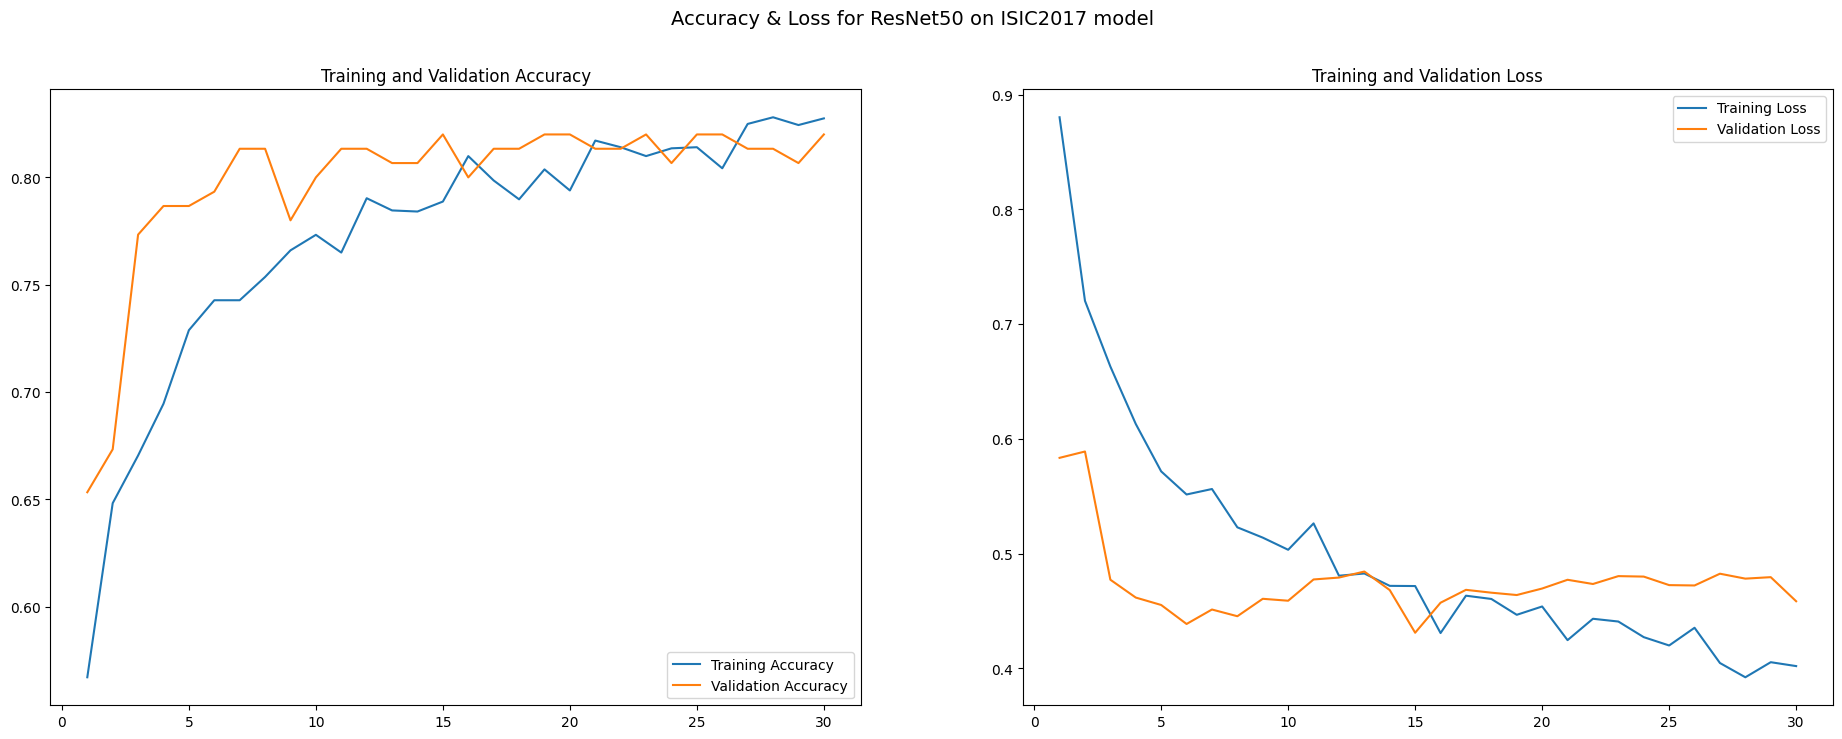

In [17]:
# Solely training ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2017'
model = base_model.myresnet50()

# Train ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [20]:
model_name = 'ResNet50 trained with ISIC2017'
filename = 'ResNet50 on ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with ISIC2017 model...

52/52 [==============================] - 2s 23ms/step - loss: 0.6535 - accuracy: 0.6683
Train loss = 0.6535233855247498  ;  Train accuracy = 66.83%

32/32 [==============================] - 1s 29ms/step - loss: 0.6320 - accuracy: 0.6770
Validation loss = 0.6319933533668518  ;  Validation accuracy = 67.70%

21/21 [==============================] - 0s 23ms/step - loss: 0.6392 - accuracy: 0.6682
Test loss = 0.639152467250824  ;  Test accuracy = 66.82%
Testing on HAM10000
Evaluating ResNet50 trained with ISIC2017 model...

251/251 [==============================] - 6s 23ms/step - loss: 0.4112 - accuracy: 0.8214
Train loss = 0.4112228751182556  ;  Train accuracy = 82.14%

28/28 [==============================] - 1s 23ms/step - loss: 0.3092 - accuracy: 0.8856
Validation loss = 0.30923518538475037  ;  Validation accuracy = 88.56%

35/35 [==============================] - 1s 24ms/step - loss: 0.2982 - accuracy: 0.9012
Tes

Reloading 'melanoma.util'.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)       

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
136/136 [==============================] - 72s 530ms/step - loss: 0.4821 - accuracy: 0.7755 - val_loss: 0.1940 - val_accuracy: 0.9445
Epoch 3/30
136/136 [==============================] - 73s 533ms/step - loss: 0.4297 - accuracy: 0.8162 - val_loss: 0.1767 - val_accuracy: 0.9445
Epoch 4/30
136/136 [==============================] - 73s 533ms/step - loss: 0.3946 - accuracy: 0.8353 - val_loss: 0.1723 - val_accuracy: 0.9436
Epoch 5/30
136/136 [==============================] - 73s 531ms/step - loss: 0.3855 - accuracy: 0.8388 - val_loss: 0.1699 - val_accuracy: 0.9445
Epoch 6/30
136/136 [==============================] - 73s 530ms/step - loss: 0.3606 - accuracy: 0.8493 - val_loss: 0.1643 - val_accuracy: 0.9426
Epoch 7/30
136/136 [==============================] - 73s 532ms/step - loss: 0.3453 - accuracy: 0.8572 - val_loss: 0.1595 - val_accuracy: 0.9464
Epoch 8/30
136/136 [==============================] - 73s 531ms/step - loss: 0.3464 - accuracy: 0.8625 - val_loss: 0.1609 - val_ac

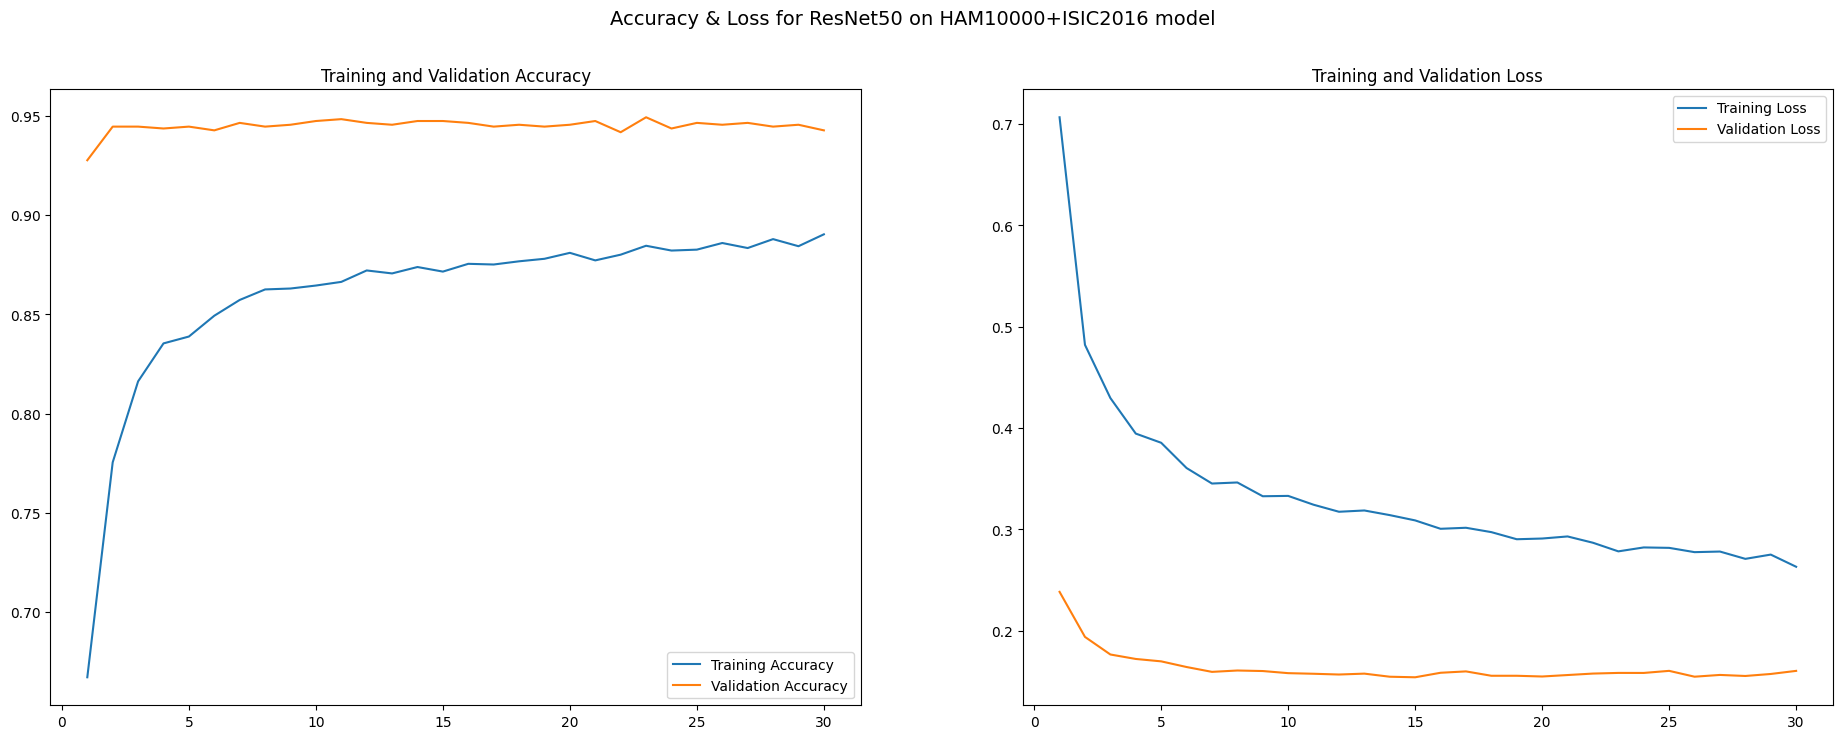

In [19]:
# training HAM10000 + ISIC2016
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_ISIC2016_224h_224w.pkl')
# HAM10000_ISIC2016_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000+ISIC2016'
model = base_model.myresnet50()

# Train HAM10000 + ISIC2016
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [21]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016'
filename = 'ResNet50 on HAM10000+ISIC2016.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with HAM10000+ISIC2016 model...



52/52 [==============================] - 2s 23ms/step - loss: 0.9122 - accuracy: 0.6243
Train loss = 0.9122083783149719  ;  Train accuracy = 62.43%

32/32 [==============================] - 1s 23ms/step - loss: 0.9234 - accuracy: 0.6190
Validation loss = 0.92335045337677  ;  Validation accuracy = 61.90%

21/21 [==============================] - 1s 32ms/step - loss: 0.9184 - accuracy: 0.6242
Test loss = 0.9183874726295471  ;  Test accuracy = 62.42%
Testing on HAM10000
Evaluating ResNet50 trained with HAM10000+ISIC2016 model...



251/251 [==============================] - 6s 23ms/step - loss: 0.2470 - accuracy: 0.8956
Train loss = 0.24703219532966614  ;  Train accuracy = 89.56%

28/28 [==============================] - 1s 22ms/step - loss: 0.1049 - accuracy: 0.9672
Validation loss = 0.10492904484272003  ;  Validation accuracy = 96.72%

35/35 [==============================] - 1s 22ms/step - loss: 0.0961 - accuracy: 0.9655
Test loss = 0.09607543051242828  ;  Test accuracy = 96.55%
Testing on ISIC2016
Evaluating ResNet50 trained with HAM10000+ISIC2016 model...



23/23 [==============================] - 1s 23ms/step - loss: 0.3808 - accuracy: 0.8292
Train loss = 0.3808399736881256  ;  Train accuracy = 82.92%

6/6 [==============================] - 0s 21ms/step - loss: 0.3958 - accuracy: 0.8500
Validation loss = 0.3958008289337158  ;  Validation accuracy = 85.00%

12/12 [==============================] - 0s 22ms/step - loss: 0.4141 - accuracy: 0.8259
Test loss = 0.41407865285873413  ;  Test accuracy = 82.59%
Testing on ISIC2017
Evaluating ResNet50 trained with HAM10000+ISIC2016 model...



63/63 [==============================] - 2s 24ms/step - loss: 0.4689 - accuracy: 0.8270
Train loss = 0.4688551127910614  ;  Train accuracy = 82.70%

5/5 [==============================] - 0s 29ms/step - loss: 0.5510 - accuracy: 0.7867
Validation loss = 0.5509901642799377  ;  Validation accuracy = 78.67%

19/19 [==============================] - 0s 22ms/step - loss: 0.5849 - accuracy: 0.8167
Test loss = 0.584865152835846  ;  Test accuracy = 81.67%


In [3]:
# training HAM10000 + ISIC2016 + ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_ISIC2016_ISIC2017_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000+ISIC2016+ISIC2017'
model = base_model.myresnet50()

# Train HAM10000 + ISIC2016 +ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

2023-12-31 18:07:58.762737: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-12-31 18:07:58.935694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-12-31 18:07:58.935737: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-12-31 18:07:58.940127: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-31 18:07:58.940168: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-12-31 18:07:58.941380: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

2023-12-31 18:08:01.674288: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-31 18:08:01.692771: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/30


2023-12-31 18:08:04.755436: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-31 18:08:05.390333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-31 18:08:06.076889: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-31 18:08:06.076916: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-31 18:08:06.076976: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-31 18:08:06.121067: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-31 18:08:06.853507: I tensorflow/stream_exec

  1/167 [..............................] - ETA: 16:22 - loss: 1.0053 - accuracy: 0.5000

2023-12-31 18:08:07.616418: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


167/167 [==============================] - 96s 545ms/step - loss: 0.8718 - accuracy: 0.5653 - val_loss: 0.4796 - val_accuracy: 0.7774


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
167/167 [==============================] - 89s 527ms/step - loss: 0.7012 - accuracy: 0.6445 - val_loss: 0.3726 - val_accuracy: 0.8739
Epoch 3/30
167/167 [==============================] - 89s 529ms/step - loss: 0.5901 - accuracy: 0.7079 - val_loss: 0.3246 - val_accuracy: 0.8978
Epoch 4/30
167/167 [==============================] - 89s 529ms/step - loss: 0.5254 - accuracy: 0.7493 - val_loss: 0.2692 - val_accuracy: 0.9093
Epoch 5/30
167/167 [==============================] - 89s 528ms/step - loss: 0.4840 - accuracy: 0.7788 - val_loss: 0.2369 - val_accuracy: 0.9176
Epoch 6/30
167/167 [==============================] - 89s 530ms/step - loss: 0.4402 - accuracy: 0.8055 - val_loss: 0.2263 - val_accuracy: 0.9225
Epoch 7/30
167/167 [==============================] - 89s 527ms/step - loss: 0.4200 - accuracy: 0.8153 - val_loss: 0.2292 - val_accuracy: 0.9225
Epoch 8/30
167/167 [==============================] - 89s 527ms/step - loss: 0.4039 - accuracy: 0.8292 - val_loss: 0.2179 - val_ac

NameError: name 'visualizer' is not defined

In [22]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016+ISIC2017'
filename = 'ResNet50 on HAM10000+ISIC2016+ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model...

52/52 [==============================] - 2s 22ms/step - loss: 0.6889 - accuracy: 0.6726
Train loss = 0.6888524889945984  ;  Train accuracy = 67.26%

32/32 [==============================] - 1s 22ms/step - loss: 0.6962 - accuracy: 0.6630
Validation loss = 0.6961986422538757  ;  Validation accuracy = 66.30%

21/21 [==============================] - 0s 22ms/step - loss: 0.7110 - accuracy: 0.6833
Test loss = 0.7110281586647034  ;  Test accuracy = 68.33%
Testing on HAM10000
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model...

251/251 [==============================] - 6s 23ms/step - loss: 0.2349 - accuracy: 0.9005
Train loss = 0.23494984209537506  ;  Train accuracy = 90.05%

28/28 [==============================] - 1s 24ms/step - loss: 0.1083 - accuracy: 0.9615
Validation loss = 0.10831023752689362  ;  Validation accuracy = 96.15%

35/35 [==============================] - 1s 23ms/step

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

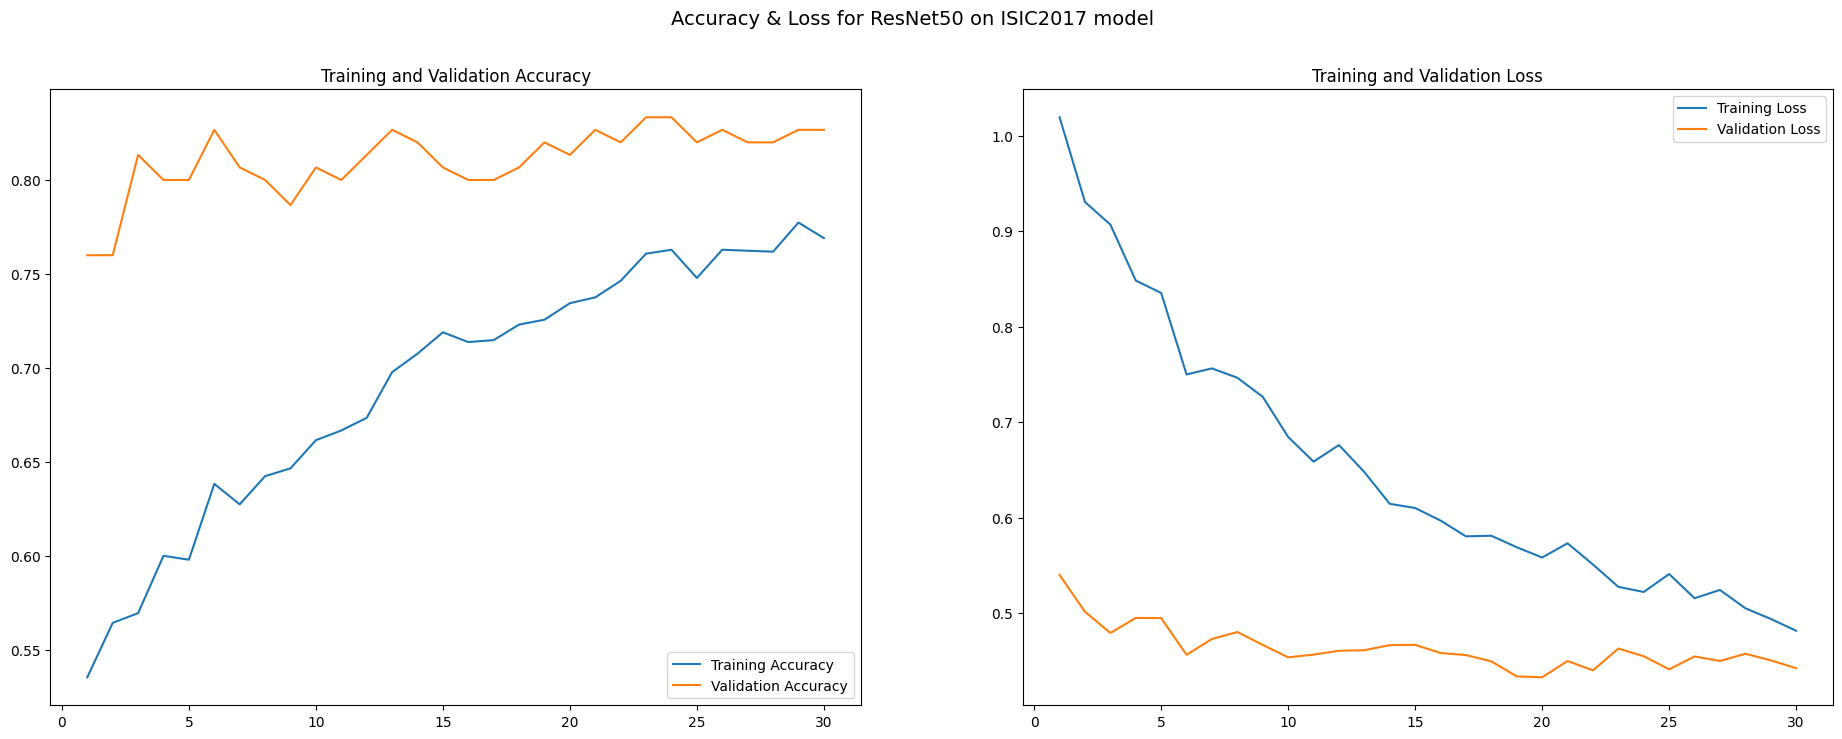

In [8]:
# training ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2017_224h_224w_binary.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2017'
model = base_model.myresnet50()

# Train ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [33]:
model_name = 'ResNet50 trained with ISIC2017'
filename = 'ResNet50 on ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with ISIC2017 model...

52/52 [==============================] - 2s 22ms/step - loss: 0.6535 - accuracy: 0.6683
Train loss = 0.6535233855247498  ;  Train accuracy = 66.83%

32/32 [==============================] - 1s 22ms/step - loss: 0.6320 - accuracy: 0.6770
Validation loss = 0.6319933533668518  ;  Validation accuracy = 67.70%

21/21 [==============================] - 0s 22ms/step - loss: 0.6392 - accuracy: 0.6682
Test loss = 0.639152467250824  ;  Test accuracy = 66.82%
Testing on HAM10000
Evaluating ResNet50 trained with ISIC2017 model...

251/251 [==============================] - 6s 22ms/step - loss: 0.4112 - accuracy: 0.8214
Train loss = 0.4112228751182556  ;  Train accuracy = 82.14%

28/28 [==============================] - 1s 24ms/step - loss: 0.3092 - accuracy: 0.8856
Validation loss = 0.30923518538475037  ;  Validation accuracy = 88.56%

35/35 [==============================] - 1s 24ms/step - loss: 0.2982 - accuracy: 0.9012
Tes

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

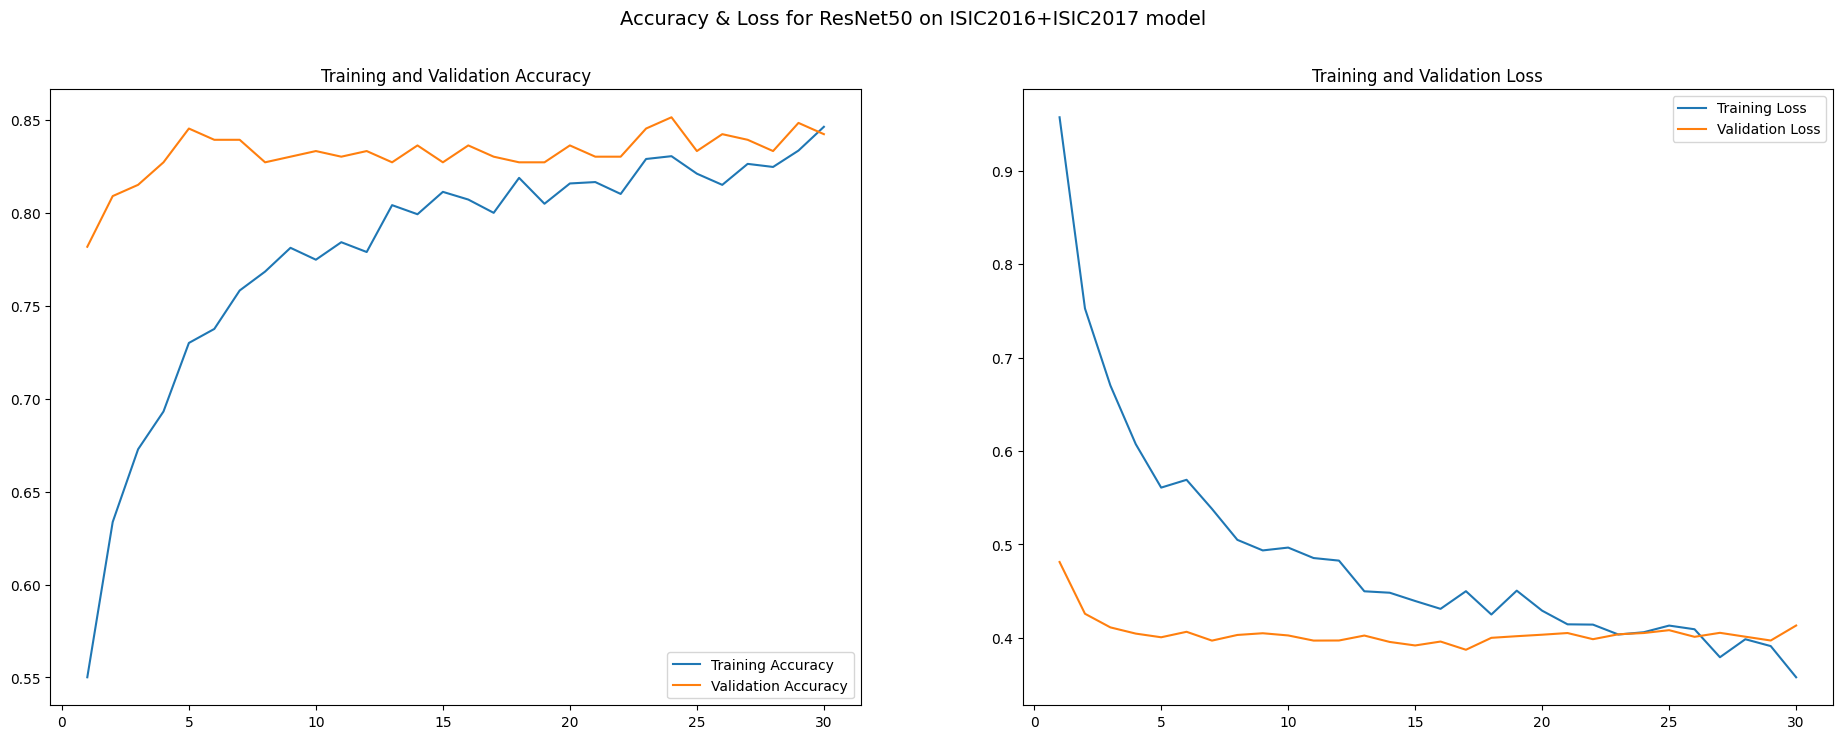

In [11]:
# training ISIC2016+ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_ISIC2017_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016+ISIC2017'
model = base_model.myresnet50()

# Train ISIC2016+ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [23]:
model_name = 'ResNet50 trained with ISIC2016+ISIC2017'
filename = 'ResNet50 on ISIC2016+ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with ISIC2016+ISIC2017 model...



52/52 [==============================] - 2s 23ms/step - loss: 0.7153 - accuracy: 0.6677
Train loss = 0.7152724266052246  ;  Train accuracy = 66.77%

32/32 [==============================] - 1s 22ms/step - loss: 0.7131 - accuracy: 0.6670
Validation loss = 0.7130667567253113  ;  Validation accuracy = 66.70%

21/21 [==============================] - 0s 22ms/step - loss: 0.7297 - accuracy: 0.6606
Test loss = 0.7296955585479736  ;  Test accuracy = 66.06%
Testing on HAM10000
Evaluating ResNet50 trained with ISIC2016+ISIC2017 model...



251/251 [==============================] - 6s 23ms/step - loss: 0.3855 - accuracy: 0.8458
Train loss = 0.3854949474334717  ;  Train accuracy = 84.58%

28/28 [==============================] - 1s 22ms/step - loss: 0.2558 - accuracy: 0.9264
Validation loss = 0.2558290362358093  ;  Validation accuracy = 92.64%

35/35 [==============================] - 1s 22ms/step - loss: 0.2555 - accuracy: 0.9166
Test loss = 0.25553998351097107  ;  Test accuracy = 91.66%
Testing on ISIC2016
Evaluating ResNet50 trained with ISIC2016+ISIC2017 model...



23/23 [==============================] - 1s 25ms/step - loss: 0.2953 - accuracy: 0.8694
Train loss = 0.29532018303871155  ;  Train accuracy = 86.94%

6/6 [==============================] - 0s 27ms/step - loss: 0.3347 - accuracy: 0.8444
Validation loss = 0.33468568325042725  ;  Validation accuracy = 84.44%

12/12 [==============================] - 0s 24ms/step - loss: 0.3278 - accuracy: 0.8760
Test loss = 0.3277858793735504  ;  Test accuracy = 87.60%
Testing on ISIC2017
Evaluating ResNet50 trained with ISIC2016+ISIC2017 model...



63/63 [==============================] - 2s 23ms/step - loss: 0.3392 - accuracy: 0.8560
Train loss = 0.3391513526439667  ;  Train accuracy = 85.60%

5/5 [==============================] - 0s 21ms/step - loss: 0.4501 - accuracy: 0.8133
Validation loss = 0.45009592175483704  ;  Validation accuracy = 81.33%

19/19 [==============================] - 0s 22ms/step - loss: 0.4440 - accuracy: 0.8067
Test loss = 0.4440419375896454  ;  Test accuracy = 80.67%


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
193/193 [==============================] - 104s 535ms/step - loss: 0.5011 - accuracy: 0.7677 - val_loss: 0.3977 - val_accuracy: 0.8016
Epoch 3/30
193/193 [==============================] - 103s 532ms/step - loss: 0.4599 - accuracy: 0.7913 - val_loss: 0.3751 - val_accuracy: 0.8134
Epoch 4/30
193/193 [==============================] - 104s 535ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.3762 - val_accuracy: 0.8161
Epoch 5/30
193/193 [==============================] - 103s 533ms/step - loss: 0.4194 - accuracy: 0.8120 - val_loss: 0.3569 - val_accuracy: 0.8211
Epoch 6/30
193/193 [==============================] - 104s 535ms/step - loss: 0.4079 - accuracy: 0.8206 - val_loss: 0.3440 - val_accuracy: 0.8278
Epoch 7/30
193/193 [==============================] - 104s 535ms/step - loss: 0.3938 - accuracy: 0.8252 - val_loss: 0.3339 - val_accuracy: 0.8360
Epoch 8/30
193/193 [==============================] - 104s 538ms/step - loss: 0.3833 - accuracy: 0.8256 - val_loss: 0.3466 -

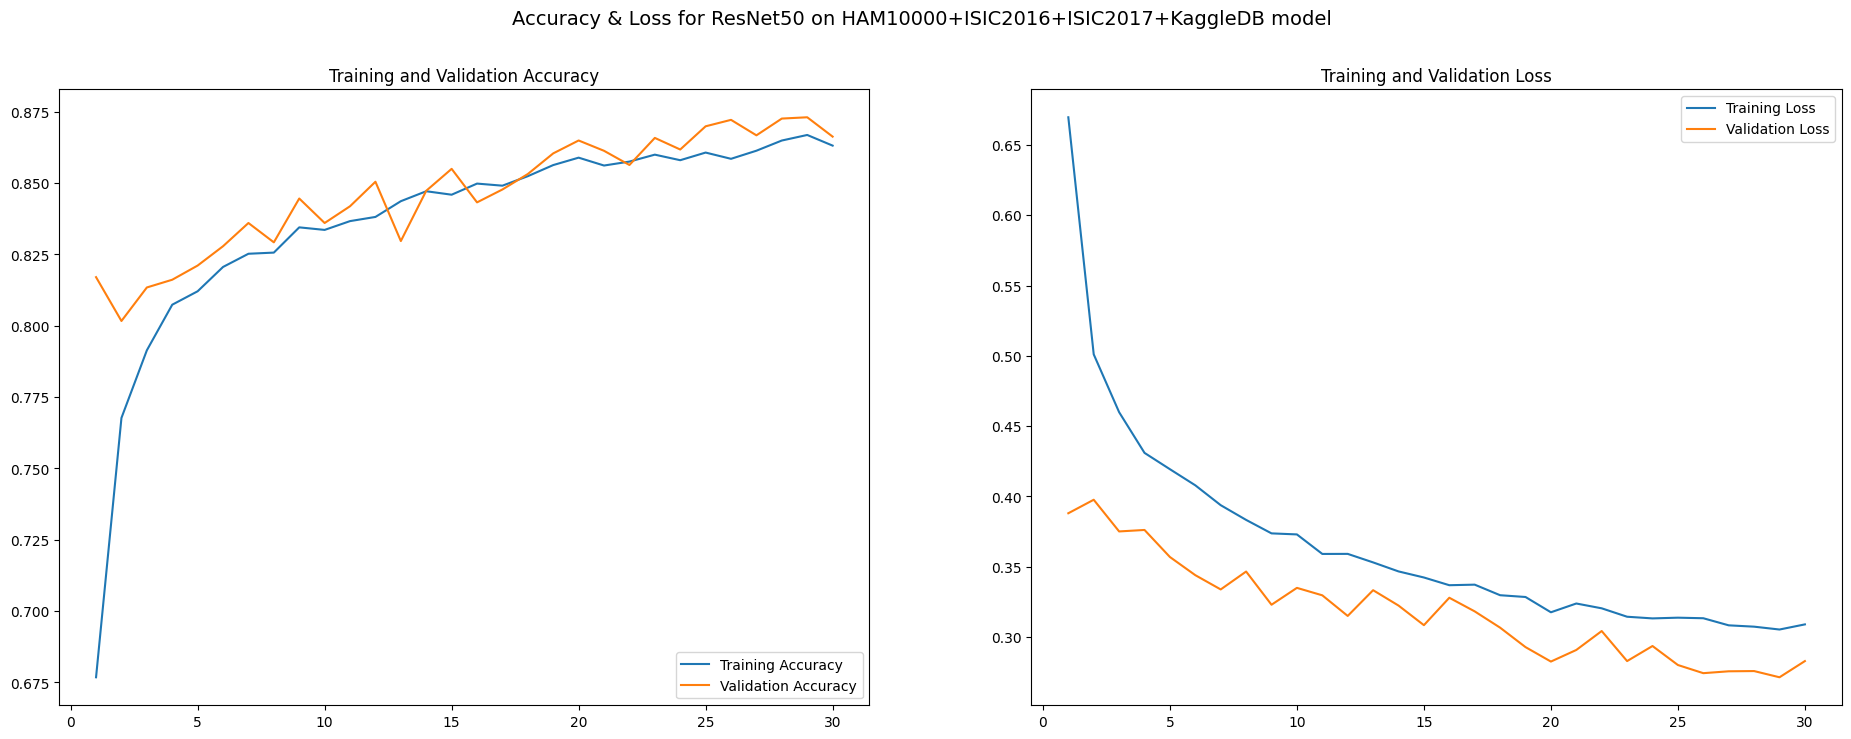

In [24]:
# training HAM10000 + ISIC2016 + ISIC2017 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_ISIC2016_ISIC2017_KaggleDB_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000+ISIC2016+ISIC2017+KaggleDB'
model = base_model.myresnet50()

# Train HAM10000 + ISIC2016 +ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [25]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB'
filename = 'ResNet50 on HAM10000+ISIC2016+ISIC2017+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



52/52 [==============================] - 2s 23ms/step - loss: 0.3186 - accuracy: 0.8326
Train loss = 0.31858623027801514  ;  Train accuracy = 83.26%

32/32 [==============================] - 1s 22ms/step - loss: 0.3669 - accuracy: 0.8110
Validation loss = 0.36688289046287537  ;  Validation accuracy = 81.10%

21/21 [==============================] - 0s 22ms/step - loss: 0.3941 - accuracy: 0.8030
Test loss = 0.39406973123550415  ;  Test accuracy = 80.30%
Testing on HAM10000
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



251/251 [==============================] - 6s 23ms/step - loss: 0.2386 - accuracy: 0.8985
Train loss = 0.2386043220758438  ;  Train accuracy = 89.85%

28/28 [==============================] - 1s 22ms/step - loss: 0.1252 - accuracy: 0.9558
Validation loss = 0.1251692920923233  ;  Validation accuracy = 95.58%

35/35 [==============================] - 1s 22ms/step - loss: 0.1154 - accuracy: 0.9601
Test loss = 0.11538763344287872  ;  Test accuracy = 96.01%
Testing on ISIC2016
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



23/23 [==============================] - 1s 25ms/step - loss: 0.3055 - accuracy: 0.8625
Train loss = 0.3054530620574951  ;  Train accuracy = 86.25%

6/6 [==============================] - 0s 26ms/step - loss: 0.3304 - accuracy: 0.8722
Validation loss = 0.33043381571769714  ;  Validation accuracy = 87.22%

12/12 [==============================] - 0s 25ms/step - loss: 0.3358 - accuracy: 0.8628
Test loss = 0.3358220160007477  ;  Test accuracy = 86.28%
Testing on ISIC2017
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



63/63 [==============================] - 2s 23ms/step - loss: 0.3404 - accuracy: 0.8515
Train loss = 0.3403545618057251  ;  Train accuracy = 85.15%

5/5 [==============================] - 0s 21ms/step - loss: 0.4251 - accuracy: 0.8000
Validation loss = 0.4250742495059967  ;  Validation accuracy = 80.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.5178 - accuracy: 0.7783
Test loss = 0.5177993774414062  ;  Test accuracy = 77.83%


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

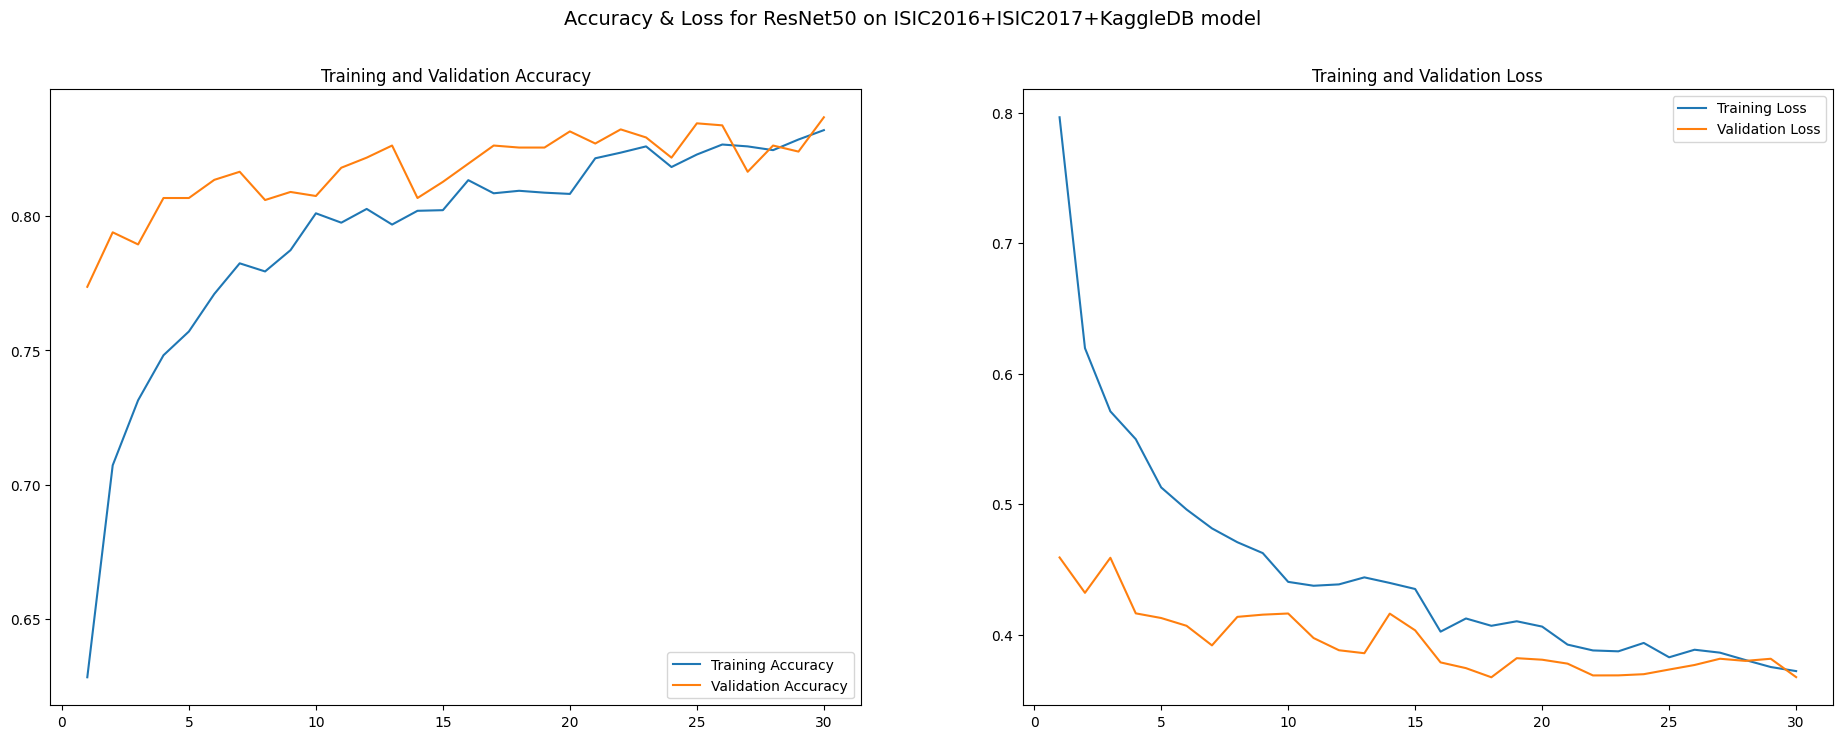

In [26]:
# training ISIC2016 + ISIC2017 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_ISIC2017_KaggleDB_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016+ISIC2017+KaggleDB'
model = base_model.myresnet50()

# Train ISIC2016 +ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [27]:
model_name = 'ResNet50 trained with ISIC2016+ISIC2017+KaggleDB'
filename = 'ResNet50 on ISIC2016+ISIC2017+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



52/52 [==============================] - 2s 23ms/step - loss: 0.3134 - accuracy: 0.8467
Train loss = 0.31337711215019226  ;  Train accuracy = 84.67%

32/32 [==============================] - 1s 23ms/step - loss: 0.3518 - accuracy: 0.8310
Validation loss = 0.351839154958725  ;  Validation accuracy = 83.10%

21/21 [==============================] - 1s 24ms/step - loss: 0.3918 - accuracy: 0.8061
Test loss = 0.3917602598667145  ;  Test accuracy = 80.61%
Testing on HAM10000
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



251/251 [==============================] - 6s 23ms/step - loss: 0.5175 - accuracy: 0.7411
Train loss = 0.5175427794456482  ;  Train accuracy = 74.11%

28/28 [==============================] - 1s 22ms/step - loss: 0.3112 - accuracy: 0.8584
Validation loss = 0.31119468808174133  ;  Validation accuracy = 85.84%

35/35 [==============================] - 1s 22ms/step - loss: 0.3126 - accuracy: 0.8758
Test loss = 0.31260916590690613  ;  Test accuracy = 87.58%
Testing on ISIC2016
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



23/23 [==============================] - 2s 23ms/step - loss: 0.3339 - accuracy: 0.8569
Train loss = 0.3338763415813446  ;  Train accuracy = 85.69%

6/6 [==============================] - 0s 21ms/step - loss: 0.3627 - accuracy: 0.8333
Validation loss = 0.36271026730537415  ;  Validation accuracy = 83.33%

12/12 [==============================] - 0s 22ms/step - loss: 0.3678 - accuracy: 0.8470
Test loss = 0.36776161193847656  ;  Test accuracy = 84.70%
Testing on ISIC2017
Evaluating ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



63/63 [==============================] - 2s 24ms/step - loss: 0.3639 - accuracy: 0.8465
Train loss = 0.3638618290424347  ;  Train accuracy = 84.65%

5/5 [==============================] - 0s 21ms/step - loss: 0.4756 - accuracy: 0.7800
Validation loss = 0.47556817531585693  ;  Validation accuracy = 78.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.5203 - accuracy: 0.7500
Test loss = 0.520264208316803  ;  Test accuracy = 75.00%


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

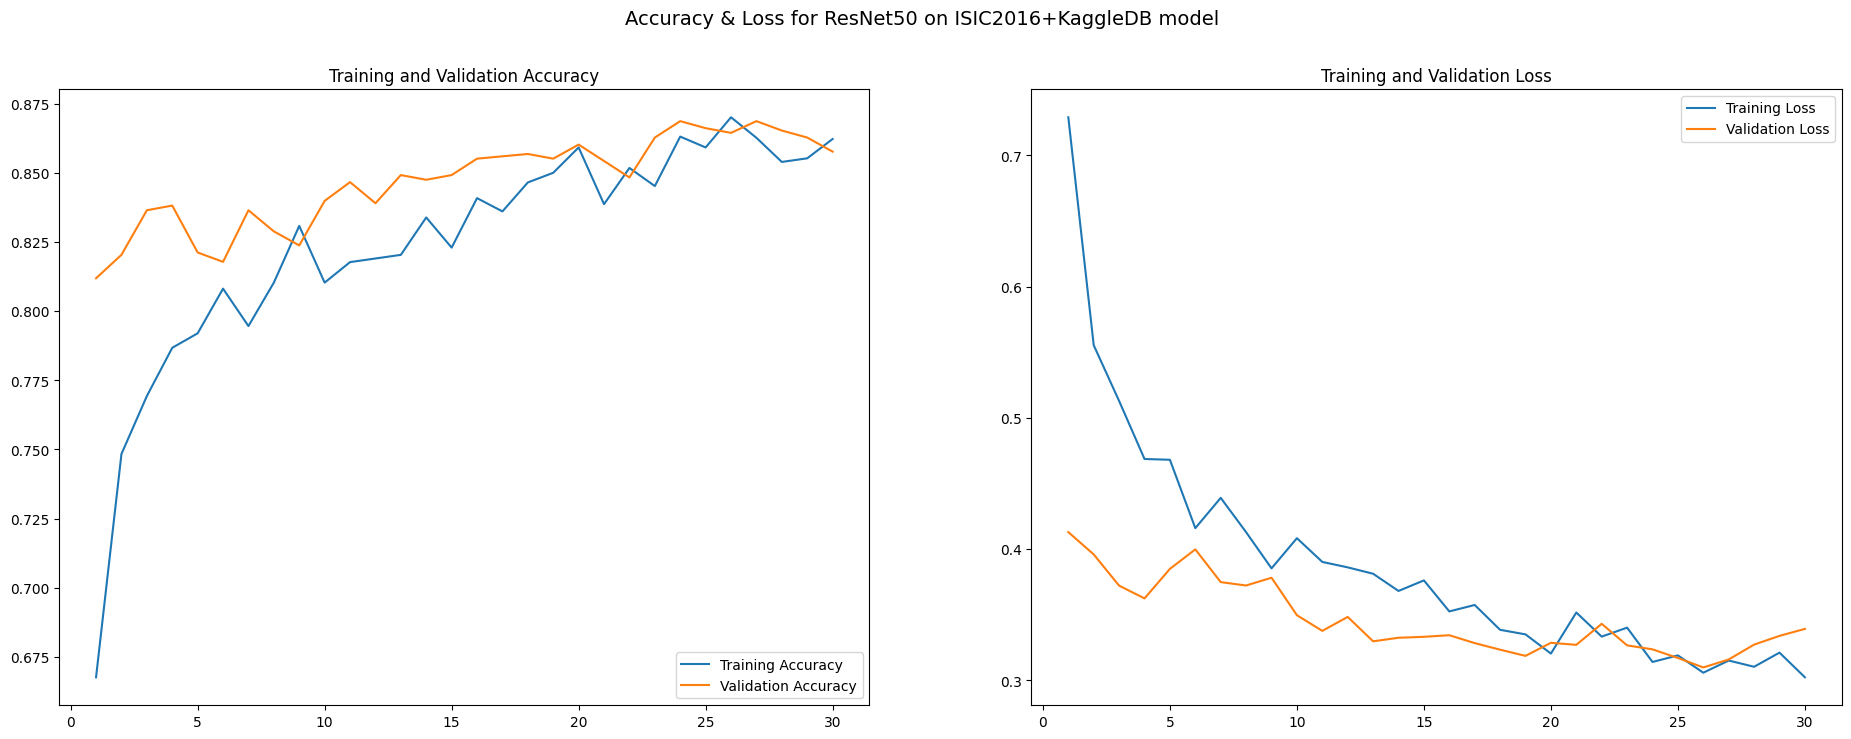

In [28]:
# training ISIC2016 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_KaggleDB_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016+KaggleDB'
model = base_model.myresnet50()

# Train ISIC2016 +ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [29]:
model_name = 'ResNet50 trained with ISIC2016+KaggleDB'
filename = 'ResNet50 on ISIC2016+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



52/52 [==============================] - 2s 23ms/step - loss: 0.2095 - accuracy: 0.9035
Train loss = 0.20953033864498138  ;  Train accuracy = 90.35%

32/32 [==============================] - 1s 22ms/step - loss: 0.2817 - accuracy: 0.8760
Validation loss = 0.2816872000694275  ;  Validation accuracy = 87.60%

21/21 [==============================] - 0s 22ms/step - loss: 0.3096 - accuracy: 0.8561
Test loss = 0.30955272912979126  ;  Test accuracy = 85.61%
Testing on HAM10000
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



251/251 [==============================] - 6s 23ms/step - loss: 0.5273 - accuracy: 0.7595
Train loss = 0.5272782444953918  ;  Train accuracy = 75.95%

28/28 [==============================] - 1s 22ms/step - loss: 0.2727 - accuracy: 0.8822
Validation loss = 0.27273693680763245  ;  Validation accuracy = 88.22%

35/35 [==============================] - 1s 26ms/step - loss: 0.2857 - accuracy: 0.8794
Test loss = 0.2856612205505371  ;  Test accuracy = 87.94%
Testing on ISIC2016
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



23/23 [==============================] - 1s 23ms/step - loss: 0.3143 - accuracy: 0.8681
Train loss = 0.3142954409122467  ;  Train accuracy = 86.81%

6/6 [==============================] - 0s 21ms/step - loss: 0.4667 - accuracy: 0.8000
Validation loss = 0.46673256158828735  ;  Validation accuracy = 80.00%

12/12 [==============================] - 0s 23ms/step - loss: 0.4212 - accuracy: 0.8338
Test loss = 0.4211667478084564  ;  Test accuracy = 83.38%
Testing on ISIC2017
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



63/63 [==============================] - 2s 22ms/step - loss: 1.1178 - accuracy: 0.6350
Train loss = 1.117779016494751  ;  Train accuracy = 63.50%

5/5 [==============================] - 0s 21ms/step - loss: 1.3970 - accuracy: 0.5533
Validation loss = 1.397027850151062  ;  Validation accuracy = 55.33%

19/19 [==============================] - 0s 22ms/step - loss: 1.5090 - accuracy: 0.5017
Test loss = 1.5090423822402954  ;  Test accuracy = 50.17%


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)              

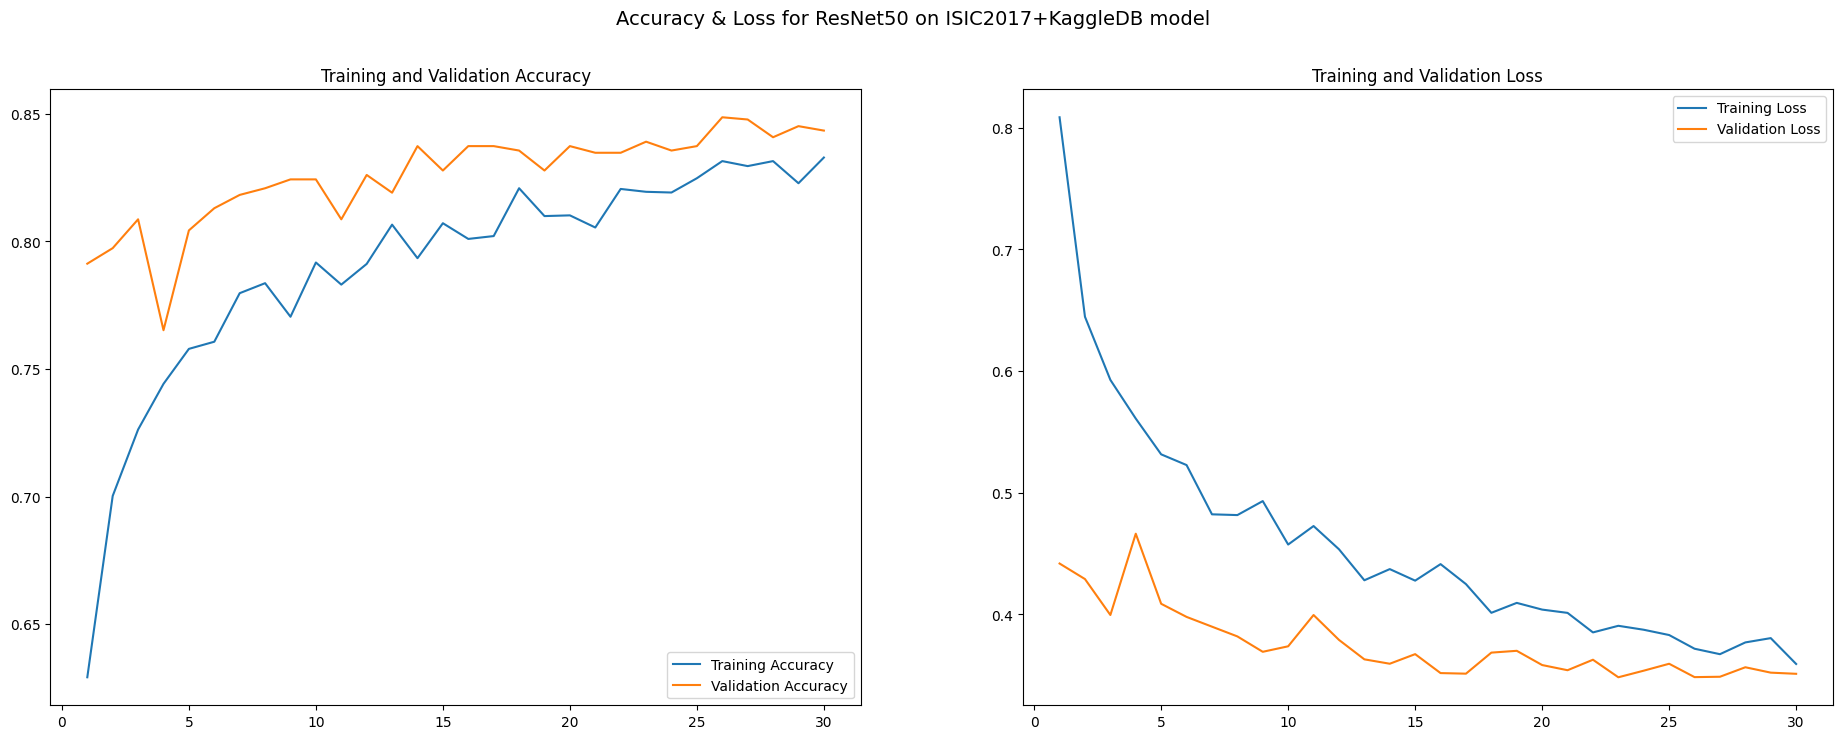

In [31]:
# training ISIC2017 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2017_KaggleDB_224h_224w.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2017+KaggleDB'
model = base_model.myresnet50()

# Train ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [32]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016+KaggleDB'
filename = 'ResNet50 on ISIC2017+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

x_train, X_test, x_val, \
			y_train, Y_test, y_val, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl')

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)

Testing on Kaggle DB
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



52/52 [==============================] - 2s 22ms/step - loss: 0.2792 - accuracy: 0.8711
Train loss = 0.2792190909385681  ;  Train accuracy = 87.11%

32/32 [==============================] - 1s 23ms/step - loss: 0.3355 - accuracy: 0.8450
Validation loss = 0.33552971482276917  ;  Validation accuracy = 84.50%

21/21 [==============================] - 1s 28ms/step - loss: 0.3724 - accuracy: 0.8318
Test loss = 0.37243586778640747  ;  Test accuracy = 83.18%
Testing on HAM10000
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



251/251 [==============================] - 6s 22ms/step - loss: 0.5501 - accuracy: 0.7468
Train loss = 0.5500643849372864  ;  Train accuracy = 74.68%

28/28 [==============================] - 1s 22ms/step - loss: 0.3414 - accuracy: 0.8630
Validation loss = 0.3414456248283386  ;  Validation accuracy = 86.30%

35/35 [==============================] - 1s 23ms/step - loss: 0.3309 - accuracy: 0.8713
Test loss = 0.33088982105255127  ;  Test accuracy = 87.13%
Testing on ISIC2016
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



23/23 [==============================] - 1s 23ms/step - loss: 0.3708 - accuracy: 0.8361
Train loss = 0.37079206109046936  ;  Train accuracy = 83.61%

6/6 [==============================] - 0s 21ms/step - loss: 0.3473 - accuracy: 0.8667
Validation loss = 0.34728771448135376  ;  Validation accuracy = 86.67%

12/12 [==============================] - 0s 22ms/step - loss: 0.3571 - accuracy: 0.8549
Test loss = 0.35714399814605713  ;  Test accuracy = 85.49%
Testing on ISIC2017
Evaluating ResNet50 trained with HAM10000+ISIC2016+KaggleDB model...



63/63 [==============================] - 2s 23ms/step - loss: 0.3590 - accuracy: 0.8475
Train loss = 0.35900455713272095  ;  Train accuracy = 84.75%

5/5 [==============================] - 0s 21ms/step - loss: 0.4336 - accuracy: 0.8000
Validation loss = 0.4336319863796234  ;  Validation accuracy = 80.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.5055 - accuracy: 0.7850
Test loss = 0.505451500415802  ;  Test accuracy = 78.50%
